In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
from torchvision import datasets, transforms
from torch.autograd import Variable
from PIL import Image

In [3]:
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import os

In [5]:
def data_loader(train_batch_size, test_batch_size):
    train_data = torch.utils.data.DataLoader(
        datasets.MNIST('data', train = True, download=True,
                       transform=transforms.Compose([
                           transforms.Resize((32, 32)),
                           transforms.ToTensor()
                       ])),
        batch_size = train_batch_size, shuffle=True)

    test_data = torch.utils.data.DataLoader(
        datasets.MNIST('data', train = False, transform=transforms.Compose([
            transforms.Resize((32, 32)),
            transforms.ToTensor()
        ])),
        batch_size = test_batch_size, shuffle=True)

    return (train_data, test_data)

In [6]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        self.c1 = nn.Conv2d(1, 6, 5)
        self.c2 = nn.Conv2d(6, 16, 5)
        self.l1 = nn.Linear(16 * 5 * 5, 120)
        self.l2 = nn.Linear(120, 84)
        self.l3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.c1(x)), 2)
        x = F.max_pool2d(F.relu(self.c2(x)), 2)

        x = x.view(x.size()[0], -1)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))

        x = self.l3(x)
        return x

In [7]:
def calculate_parameters(modelName, model):
    param = sum(p.numel() for p in model.parameters())
    print('{}: {}'.format(modelName, param))
    return param

In [8]:
def init_optimizer(model):
    return optim.SGD(model.parameters(), lr=1e-3, momentum=0.9, nesterov=True)

In [9]:
def train(model, optimizer, data):
    model.train()
    for batch_idx, (data, target) in enumerate(data):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()

        output = model(data)
        loss_fn = torch.nn.CrossEntropyLoss()
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

In [10]:
def calculate_ip_op_diff(model, loader):
    correct = 0
    total = 0
    costTotal = 0
    costCounter = 0
    loss_fn = torch.nn.CrossEntropyLoss()
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data)
            cost = loss_fn(output, target)
            costTotal += cost
            costCounter += 1
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == target[i]:
                    correct += 1
                total += 1
    return costTotal / costCounter, round(correct/total, 3)

In [11]:
epochs=28

def train_models(model, optimizer, train_data, test_data):
    param_arr = []
    train_loss_arr = []
    test_loss_arr = []
    train_accuracy_arr = []
    test_accuracy_arr = []
    total_train_loss = 0
    print('Training model ')
    for epoch in range(1, epochs + 1):
        train(model, optimizer, train_data)
        train_loss, train_acc = calculate_ip_op_diff(model, train_data)
        test_loss, test_acc = calculate_ip_op_diff(model, test_data)

        train_loss_arr.append(train_loss)
        test_loss_arr.append(test_loss)
        train_accuracy_arr.append(train_acc)
        test_accuracy_arr.append(test_acc)
#         param_arr.append(calculate_parameters('Model params',  model))
        print('test loss - ', test_loss, ' epoch - ', epoch)
    print('Training completed..')
    return train_loss_arr, test_loss_arr, train_accuracy_arr, test_accuracy_arr, param_arr

In [12]:
train_data, test_data = data_loader(75, 75)

model_1 = Model()
optimizer = init_optimizer(model_1)
train_loss_arr_b1, test_loss_arr_b1, train_accuracy_arr_b1, test_accuracy_arr_b1, param_arr_b1 = train_models(model_1, optimizer, train_data, test_data)

Training model 


[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


test loss -  tensor(1.9014)  epoch -  1
test loss -  tensor(0.3388)  epoch -  2
test loss -  tensor(0.2123)  epoch -  3
test loss -  tensor(0.1467)  epoch -  4
test loss -  tensor(0.1193)  epoch -  5
test loss -  tensor(0.1007)  epoch -  6
test loss -  tensor(0.0908)  epoch -  7
test loss -  tensor(0.0819)  epoch -  8
test loss -  tensor(0.0773)  epoch -  9
test loss -  tensor(0.0702)  epoch -  10
test loss -  tensor(0.0661)  epoch -  11
test loss -  tensor(0.0576)  epoch -  12
test loss -  tensor(0.0560)  epoch -  13
test loss -  tensor(0.0498)  epoch -  14
test loss -  tensor(0.0540)  epoch -  15
test loss -  tensor(0.0518)  epoch -  16
test loss -  tensor(0.0491)  epoch -  17
test loss -  tensor(0.0436)  epoch -  18
test loss -  tensor(0.0507)  epoch -  19
test loss -  tensor(0.0470)  epoch -  20
test loss -  tensor(0.0430)  epoch -  21
test loss -  tensor(0.0453)  epoch -  22
test loss -  tensor(0.0526)  epoch -  23
test loss -  tensor(0.0426)  epoch -  24
test loss -  tensor(0.041

In [13]:
train_data, test_data = data_loader(500, 500)

model_2 = Model()
optimizer = init_optimizer(model_2)
train_loss_arr_b2, test_loss_arr_b2, train_accuracy_arr_b2, test_accuracy_arr_b2, param_arr_b2 = train_models(model_2, optimizer, train_data, test_data)

Training model 
test loss -  tensor(2.3009)  epoch -  1
test loss -  tensor(2.2978)  epoch -  2
test loss -  tensor(2.2938)  epoch -  3
test loss -  tensor(2.2882)  epoch -  4
test loss -  tensor(2.2788)  epoch -  5
test loss -  tensor(2.2583)  epoch -  6
test loss -  tensor(2.1954)  epoch -  7
test loss -  tensor(1.8231)  epoch -  8
test loss -  tensor(0.7896)  epoch -  9
test loss -  tensor(0.5256)  epoch -  10
test loss -  tensor(0.4367)  epoch -  11
test loss -  tensor(0.3811)  epoch -  12
test loss -  tensor(0.3399)  epoch -  13
test loss -  tensor(0.3116)  epoch -  14
test loss -  tensor(0.2864)  epoch -  15
test loss -  tensor(0.2671)  epoch -  16
test loss -  tensor(0.2467)  epoch -  17
test loss -  tensor(0.2300)  epoch -  18
test loss -  tensor(0.2197)  epoch -  19
test loss -  tensor(0.2089)  epoch -  20
test loss -  tensor(0.1979)  epoch -  21
test loss -  tensor(0.1847)  epoch -  22
test loss -  tensor(0.1736)  epoch -  23
test loss -  tensor(0.1662)  epoch -  24
test loss

In [14]:
param_b1 = torch.nn.utils.parameters_to_vector(model_1.parameters())
param_b2 = torch.nn.utils.parameters_to_vector(model_2.parameters())

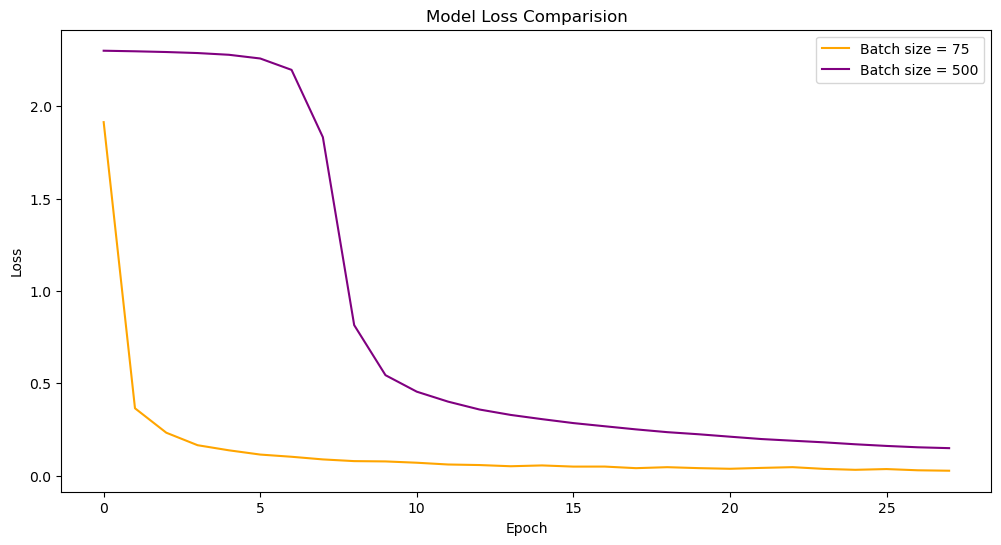

In [29]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 28, 1), train_loss_arr_b1, color = "orange")
plt.plot(np.arange(0, 28, 1), train_loss_arr_b2, color = "purple")
plt.title('Model Loss Comparision')
plt.legend(['Batch size = 75', 'Batch size = 500'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

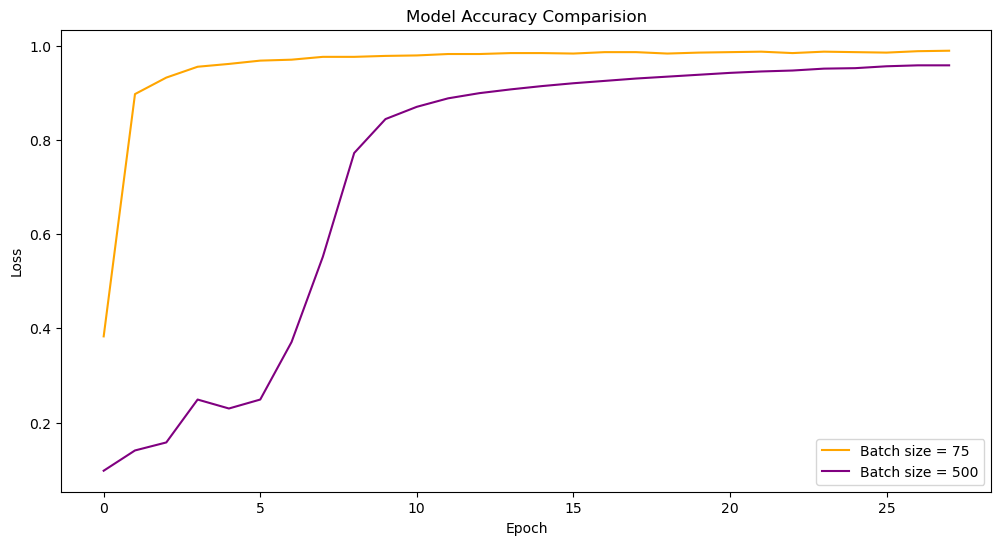

In [28]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 28, 1), test_accuracy_arr_b1, color = "orange")
plt.plot(np.arange(0, 28, 1), test_accuracy_arr_b2, color = "purple")
plt.title('Model Accuracy Comparision')
plt.legend(['Batch size = 75', 'Batch size = 500'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [17]:
alpha = np.arange(-2, 2, 0.2)
thetaArr =[]
for i in range (len(alpha)):
    theta = (1-alpha[i])*param_b1 + alpha[i]* param_b2
    thetaArr.append(theta)

In [18]:
alpha_train_loss_arr = []
alpha_test_loss_arr = []
alpha_train_acc_arr = []
alpha_test_acc_arr = []

for i in range (len(thetaArr)):
#     torch.manual_seed(1)
    print('Running for theta - ' , i)
    theta = (1-alpha[i])* param_b1 + alpha[i]*param_b2
    model = Model()
    torch.nn.utils.vector_to_parameters(theta, model.parameters())
    loss_func = nn.CrossEntropyLoss()

    temp = []
    for param in model.parameters():
        temp.append(torch.numel(param))

    alpha_train_loss, alpha_train_acc = calculate_ip_op_diff(model, train_data)
    alpha_test_loss, alpha_test_acc = calculate_ip_op_diff(model, test_data)
    print('Alpha loss - ' , alpha_test_loss)
    alpha_train_loss_arr.append(alpha_train_loss)
    alpha_train_acc_arr.append(alpha_train_acc)
    alpha_test_loss_arr.append(alpha_test_loss)
    alpha_test_acc_arr.append(alpha_test_acc)

Running for theta -  0
Alpha loss -  tensor(53.0883)
Running for theta -  1
Alpha loss -  tensor(34.1195)
Running for theta -  2
Alpha loss -  tensor(21.0813)
Running for theta -  3
Alpha loss -  tensor(12.3779)
Running for theta -  4
Alpha loss -  tensor(6.8099)
Running for theta -  5
Alpha loss -  tensor(3.4587)
Running for theta -  6
Alpha loss -  tensor(1.5860)
Running for theta -  7
Alpha loss -  tensor(0.6479)
Running for theta -  8
Alpha loss -  tensor(0.2291)
Running for theta -  9
Alpha loss -  tensor(0.0737)
Running for theta -  10
Alpha loss -  tensor(0.0374)
Running for theta -  11
Alpha loss -  tensor(0.1972)
Running for theta -  12
Alpha loss -  tensor(1.2822)
Running for theta -  13
Alpha loss -  tensor(1.7328)
Running for theta -  14
Alpha loss -  tensor(0.6601)
Running for theta -  15
Alpha loss -  tensor(0.1377)
Running for theta -  16
Alpha loss -  tensor(0.3707)
Running for theta -  17
Alpha loss -  tensor(1.7569)
Running for theta -  18
Alpha loss -  tensor(6.0619)

Text(0, 0.5, 'Loss')

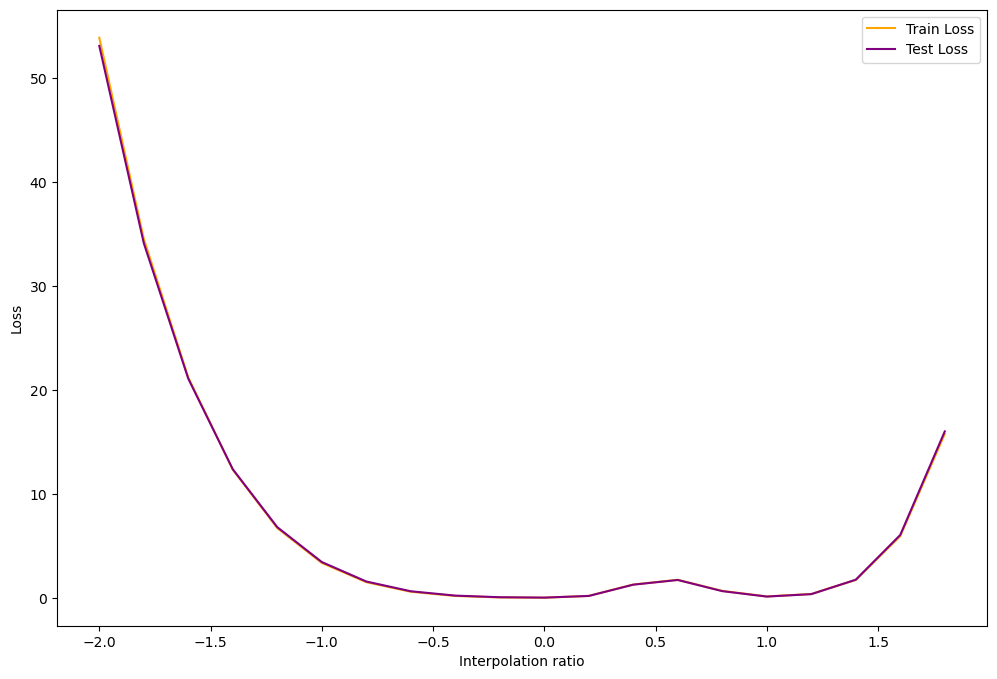

In [30]:
plt.figure(figsize=(12,8))
plt.plot(alpha, alpha_train_loss_arr, color = "orange")
plt.plot(alpha, alpha_test_loss_arr, color = "purple")
# plt.legend(loc='upper left')
plt.legend(['Train Loss' , 'Test Loss'])
plt.xlabel('Interpolation ratio')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

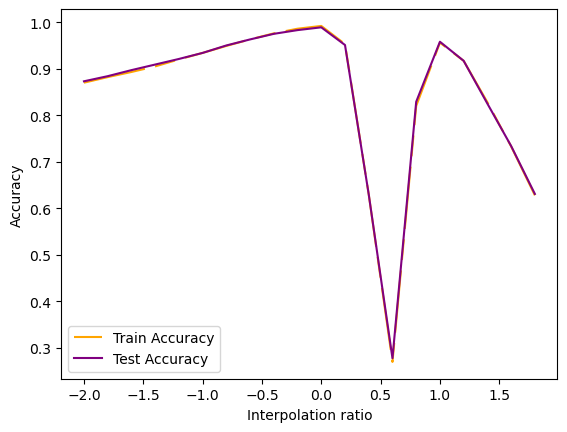

In [31]:
plt.plot(alpha, alpha_train_acc_arr, dashes=[30, 5, 10, 5], color = "orange")
plt.plot(alpha, alpha_test_acc_arr, color = "purple")
plt.legend(['Train Accuracy' , 'Test Accuracy'])
plt.xlabel('Interpolation ratio')
plt.ylabel('Accuracy')